In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv")

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [7]:
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [8]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test= train_test_split(df.Message, df.spam, test_size=0.12, random_state
                    =101)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
c=TfidfVectorizer(stop_words="english")

In [89]:
X_train_count= c.fit_transform(X_train)
X_test_count= c.transform(X_test)

In [90]:
from sklearn.naive_bayes import MultinomialNB

In [91]:
model=MultinomialNB()


In [92]:
model.fit(X_train_count, y_train)

MultinomialNB()

In [93]:
y_pred=model.predict(X_test_count)

In [94]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

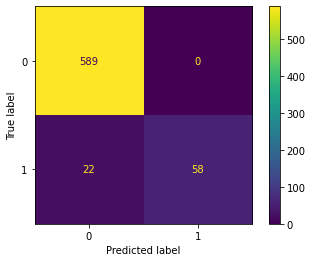

In [95]:
plot_confusion_matrix(model, X_test_count, y_test)

In [96]:
accuracy_score(y_test, y_pred)

0.9671150971599403

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       589
           1       1.00      0.72      0.84        80

    accuracy                           0.97       669
   macro avg       0.98      0.86      0.91       669
weighted avg       0.97      0.97      0.96       669



In [98]:
def classify(emails):
        emails_count= c.transform(emails)
        classify=model.predict(emails_count)
        if classify==0:
            print("Ham")
        else:
            print("Spam")

In [99]:
emails=['Hey dude, I will be there by 5pm. The plan is set. cant wait to meet']

In [100]:
classify(emails)

Ham


In [101]:
emails=['Free Demo Awaiting For You']
classify(emails)

Spam


In [103]:
from sklearn.pipeline import Pipeline

In [105]:
clf=Pipeline([('vectorizer', TfidfVectorizer()), ('nb', MultinomialNB())])

In [106]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('nb', MultinomialNB())])

In [110]:
clf.score(X_test, y_test)

0.9566517189835575

In [114]:
emails=['Free Free Free! !!']
clf.predict(emails)
if classify==0:
            print("Ham")
else:
            print("Spam")

Spam
